# Ensemble models

<img src="https://i.kym-cdn.com/entries/icons/original/000/032/196/apes.jpg" width="600">

## King County dataset

**Import of the libraries useful for the analysis**

In [1]:
# pandas -> read input file and data manipulation
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("float_format", "{:.2f}".format)

# numpy -> array manipulations
import numpy as np
np.set_printoptions(suppress=True)

# pandas, matplotlib & seaborn -> plotting
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn -> data processing, models fit, make predictions and analyze the results
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

# show sklearn objects in diagram
from sklearn import set_config
set_config(print_changed_only=False, display="diagram")

# warnings -> to silence warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/king_county.csv", index_col="id", parse_dates=["date"])

**Copy of the dataframe**

In [3]:
df_ = df.copy()

**Name of the columns/variables**  
The dataset contains 20 columns: date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15.

In [4]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

**Shape of the dataframe**  
The dataset is composed by 21613 rows and 20 columns.

In [5]:
df.shape

(21613, 20)

**Show 10 random observations**  
We have mixed variable types.

In [6]:
df.sample(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
5694000768,2014-09-22,550000.00,3,2.25,1700,1481,3.00,0,0,3,8,1700,0,2002,0,98103,47.66,-122.35,1560,1350
8155830060,2014-08-11,297000.00,3,2.25,1450,7562,2.00,0,0,3,7,1450,0,1994,0,98056,47.50,-122.19,1650,7625
2695600005,2014-06-20,325000.00,2,1.00,840,4239,1.00,0,0,3,7,840,0,1948,0,98126,47.53,-122.38,1120,4494
421069081,2015-01-27,337000.00,3,2.50,2235,43560,1.00,0,0,5,7,990,1245,1975,0,98010,47.33,-122.05,1460,29621
5706200370,2014-08-06,550000.00,4,2.75,2230,9460,1.00,0,0,5,7,1480,750,1960,0,98027,47.52,-122.04,1760,10878
422000075,2014-07-11,389950.00,4,2.50,2240,5500,2.00,0,0,3,8,2240,0,2013,0,98056,47.50,-122.17,700,5500
1775930010,2014-12-22,335000.00,3,2.75,1990,19991,1.00,0,0,3,7,1340,650,1977,0,98072,47.74,-122.11,1750,9775
1926049385,2014-07-29,559950.00,4,2.50,2650,7200,2.00,0,0,3,8,2250,400,1979,0,98133,47.73,-122.35,2110,7269
7625701386,2014-05-16,430000.00,3,1.75,2150,4333,1.00,0,0,3,7,1200,950,1956,0,98136,47.55,-122.39,1480,6500


**Informations about missing values and variables types**  
The variables doesn't have any missing values.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  int64         
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  21613 non-null  int64         
 13  yr_built       21613 non-null  int64         
 14  yr_renovated   21613 non-null  int64         
 15  zipco

**Statistical informations about numerical variables**

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.00,540088.14,367127.20,75000.00,321950.00,450000.00,645000.00,7700000.00
bedrooms,21613.00,3.37,0.93,0.00,3.00,3.00,4.00,33.00
bathrooms,21613.00,2.11,0.77,0.00,1.75,2.25,2.50,8.00
sqft_living,21613.00,2079.90,918.44,290.00,1427.00,1910.00,2550.00,13540.00
sqft_lot,21613.00,15106.97,41420.51,520.00,5040.00,7618.00,10688.00,1651359.00
floors,21613.00,1.49,0.54,1.00,1.00,1.50,2.00,3.50
waterfront,21613.00,0.01,0.09,0.00,0.00,0.00,0.00,1.00
view,21613.00,0.23,0.77,0.00,0.00,0.00,0.00,4.00
condition,21613.00,3.41,0.65,1.00,3.00,3.00,4.00,5.00
grade,21613.00,7.66,1.18,1.00,7.00,7.00,8.00,13.00


**Plot the correlations and show the clusters using the clustermap**

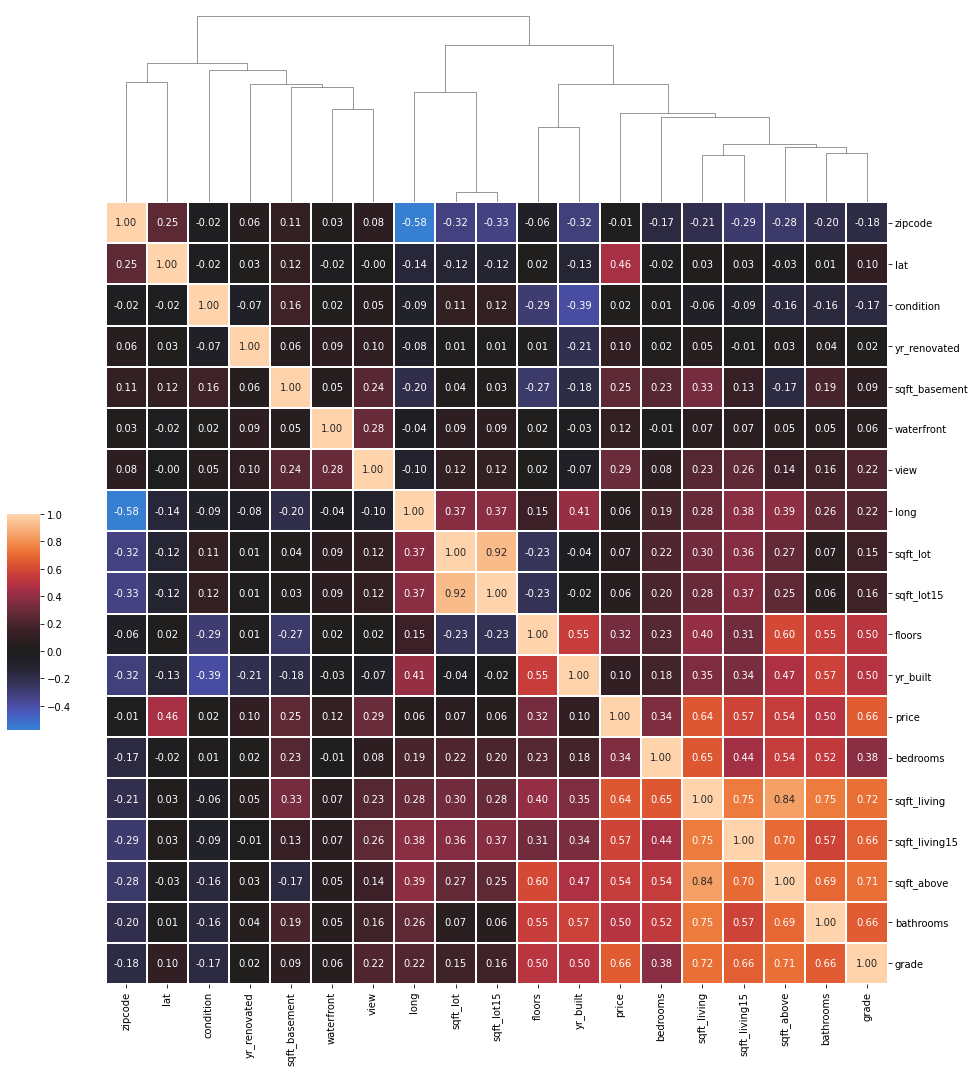

In [9]:
corr = df.corr(method="spearman")
g = sns.clustermap(data=corr, annot=True, fmt=".2f", center=0, linewidth=2, 
                   cbar_pos=(0.1, 0.32, 0.03, 0.2), figsize=(15, 15))
g.ax_row_dendrogram.remove()

**Compute the correlations with price**

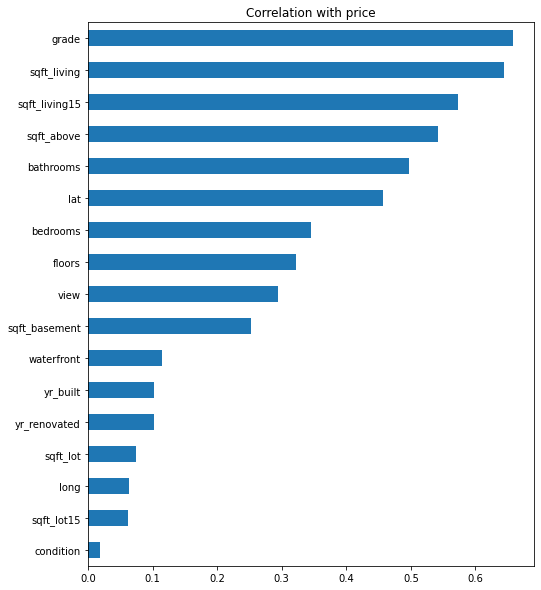

In [10]:
df.corr(method="spearman")["price"].sort_values()[1:-1] \
                                   .plot(kind="barh", figsize=(8, 10), title="Correlation with price")
plt.show()

**We use a pairplot to show the features most correlated with price**

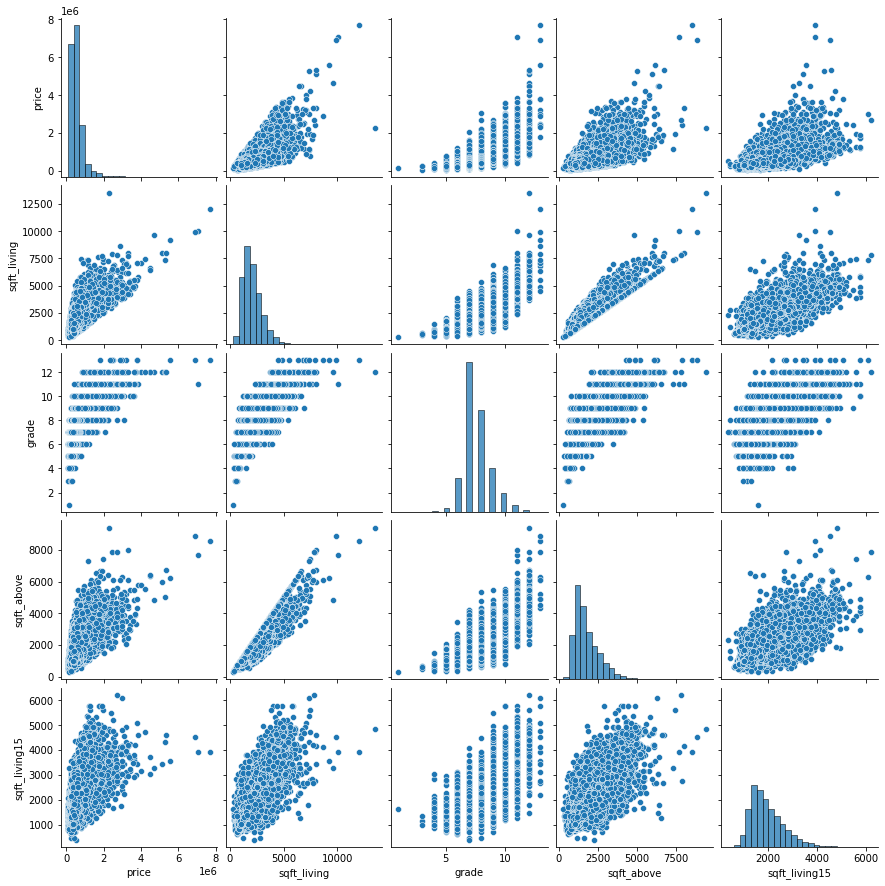

In [11]:
vars_ = [k for k, v in dict(abs(df.corr(method="spearman")["price"]) > 0.5).items() if v == True]

sns.pairplot(data=df, vars=vars_,  diag_kws={"bins": 25, "edgecolor": "black"})
plt.show()

**Plot the histogram/barplot of every variable in the dataset**

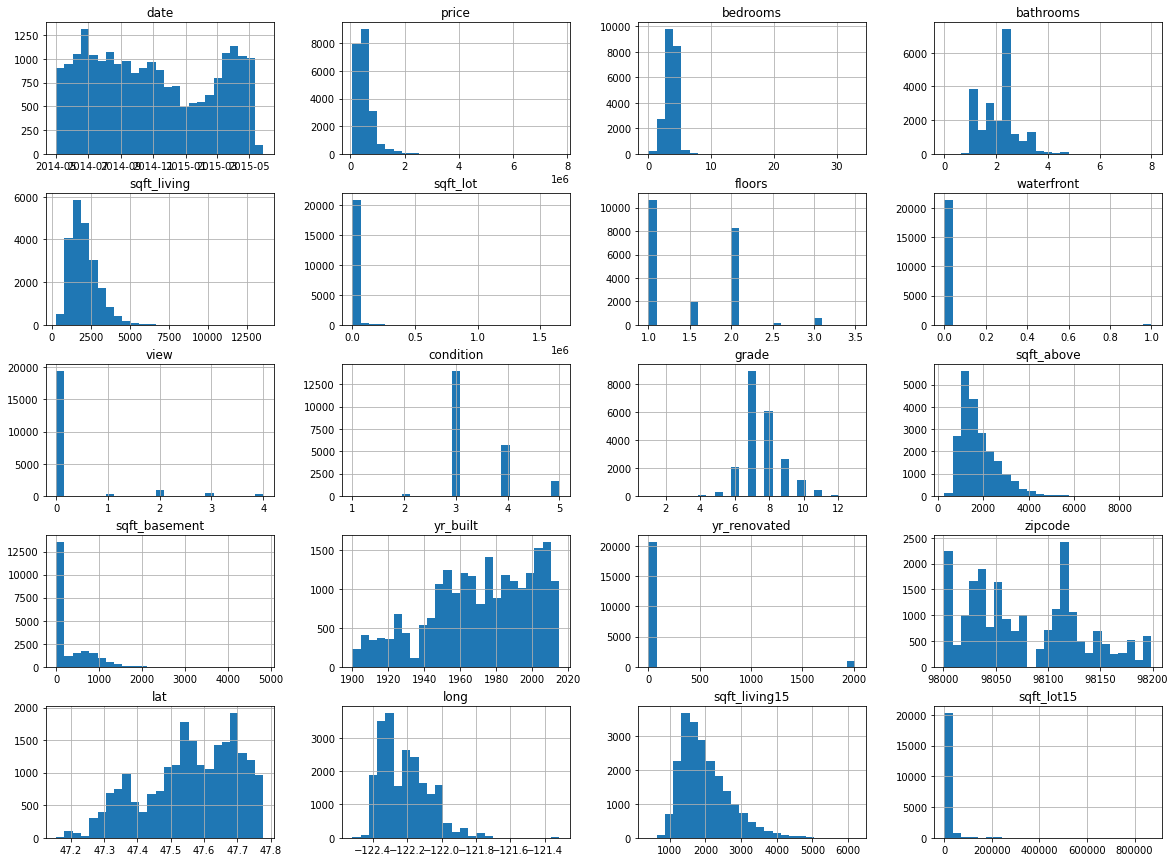

In [12]:
df.hist(bins=25, figsize=(20, 15))
plt.show()

**Plot the price fo the houses by the time**

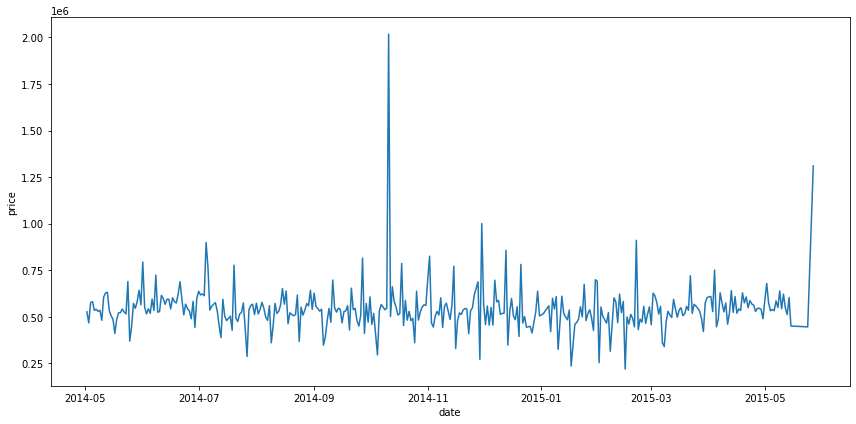

In [13]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="date", y="price", data=df, ci=None)
plt.tight_layout()
plt.show()

**Plot the houses by price (size) and zipcode (color)**

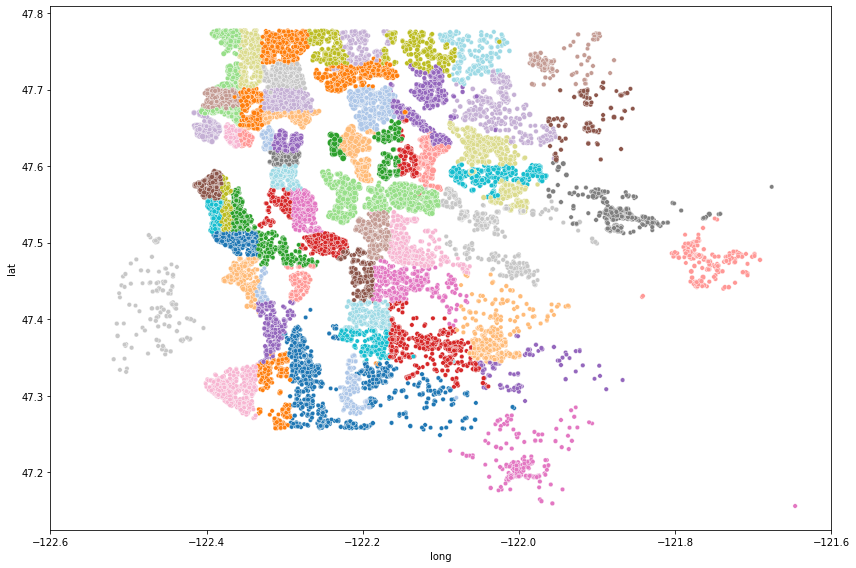

In [14]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="long", y="lat", hue="zipcode", size="price", data=df, palette="tab20", legend=None)
plt.xlim(-122.6, -121.6)
plt.tight_layout()
plt.show()

**Distribution of the target variable**

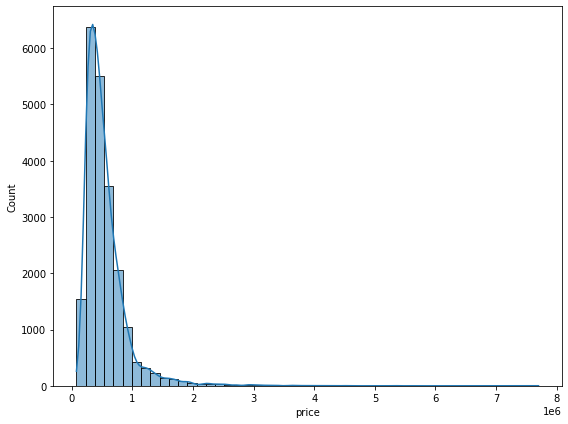

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="price", bins=50, kde=True)
plt.tight_layout()
plt.show()

**Definition of the ```X``` and ```y``` variables**

In [16]:
X = df.drop(columns=["date", "price", "zipcode"])
y = df["price"].values

**Split the data into traning and test set**

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Pre-processing of the features**  
The ```FunctionTransformer``` allow us to make a custom transformation on the data. In this case, we are applying a logarithmic transformation to the variables that have a log-normal distribution.  
documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html

In [18]:
ct = ColumnTransformer(transformers=[
    ("ft", FunctionTransformer(func=np.log, inverse_func=np.exp), ["sqft_living", "sqft_above", "sqft_living15"]),
], remainder="passthrough")
ct

ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('ft',
                                 FunctionTransformer(accept_sparse=False,
                                                     check_inverse=True,
                                                     func=<ufunc 'log'>,
                                                     inv_kw_args=None,
                                                     inverse_func=<ufunc 'exp'>,
                                                     kw_args=None,
                                                     validate=False),
                                 ['sqft_living', 'sqft_above',
                                  'sqft_living15'])],
                  verbose=False)

**Fit and transform of the transformer to the data**

In [19]:
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

**Definition of the function to plot the feature importances**

In [20]:
def feature_importances_plot(model, labels, **kwargs):
    """
    Compute normalized feature importance from model
    and return the data or show plot.
    
    Parameters
    ----------
    model : any
        scikit-learn model
    labels : list | np.array
        list of feature labels
    
    Returns
    -------
    AxesSubplot
    """
    feature_importances = model.feature_importances_
    feature_importances = 100 * (feature_importances / feature_importances.max())
    df = pd.DataFrame(data={"feature_importances": feature_importances}, index=labels)
    df.sort_values(by="feature_importances", inplace=True)
    return df.plot(kind="barh", figsize=(8, 10), title=f"Feature importances", legend=None, **kwargs)

### Random Forest

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/random-forest-algorithm.png" width="600">

documentation: [Random Forest Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)

**Definition of the model and fit to the data**

In [21]:
rfr = RandomForestRegressor(n_estimators=200, oob_score=True, n_jobs=-1, random_state=42)
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=-1, oob_score=True,
                      random_state=42, verbose=0, warm_start=False)

**Get the first decision tree**

In [22]:
rfr.estimators_[0]

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, random_state=1608637542,
                      splitter='best')

**Compute the $R^2$ score on the Out Of Bag (OOB) data**

In [23]:
rfr.oob_score_

0.8768973263689794

**Plot of the feature importances**

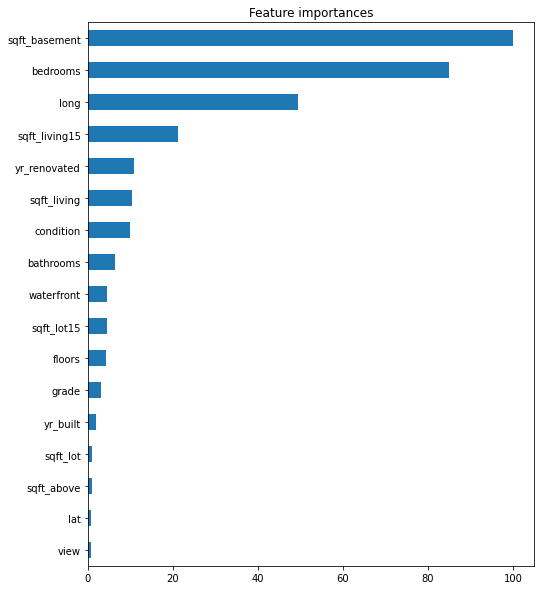

In [24]:
feature_importances_plot(model=rfr, labels=X.columns)
plt.show()

**Compute the $R^2$ score on the test set**

In [25]:
rfr.score(X_test, y_test)

0.8563530835685755

### Adaboost  
<img src="https://i.ytimg.com/vi/BoGNyWW9-mE/maxresdefault.jpg" width="700">

* documentation: [AdaBoost Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html#sklearn.ensemble.AdaBoostRegressor)

**Definition of the model and fit to the data**

In [26]:
base_estimator = DecisionTreeRegressor(max_depth=10, random_state=42)
abr = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=25, random_state=42)
abr.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=10,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       random_state=42,
                                                       splitter='best'),
                  learning_rate=1.0, loss='linear', n_estimators=25,
                  random_state=42)

**Show the estimator weights and errors**

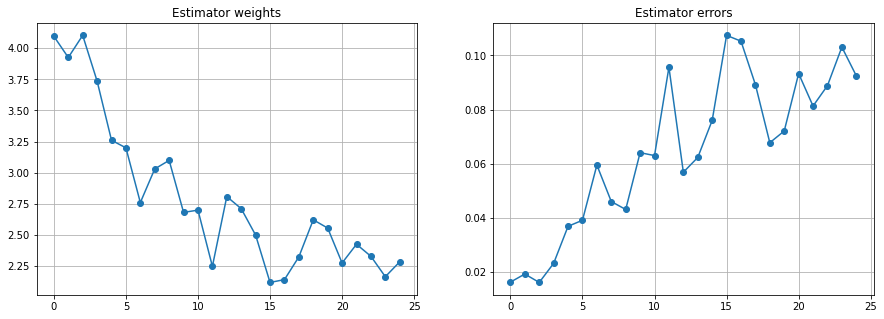

In [27]:
fig = plt.figure(figsize=(15, 5))
ax = fig.subplots(nrows=1, ncols=2)
ax[0].plot(abr.estimator_weights_, marker="o")
ax[1].plot(abr.estimator_errors_, marker="o")
ax[0].set_title("Estimator weights")
ax[1].set_title("Estimator errors")
ax[0].grid()
ax[1].grid()
plt.show()

**Compute the correlation between errors and weights**

In [28]:
np.corrcoef(abr.estimator_errors_, abr.estimator_weights_)

array([[ 1.        , -0.96980944],
       [-0.96980944,  1.        ]])

**Plot of the feature importances**

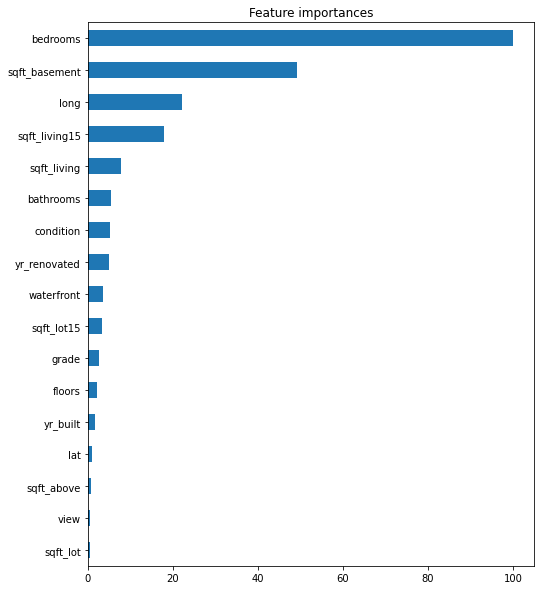

In [29]:
feature_importances_plot(model=abr, labels=X.columns)
plt.show()

**Compute the $R^2$ on the test set**

In [30]:
abr.score(X_test, y_test)

0.8653342722870858